In [57]:
import numpy as np
def Hill_X_prod(x,t,Kxy,nXY,D):
    if t<D:
        return (x**nXY/(Kxy**nXY+x**nXY))+1
    else:
        return x**nXY/(Kxy**nXY+x**nXY)

def Y_t(y,t,x,alphay,betaY,Kxy,nXY,D):
    return betaY*Hill_X_prod(y,t,Kxy,nXY,D)-alphay*y

def Rate_y(u,t,x0,x1,D,alphaY,betaY,Kxy,nXY):
    y = u
    x = x0
    D1,D2 = D
    #if t>=D1:
    #    x = x1
    #if t>=D2:
    #    x= x0
    dydt = Y_t(y,t,x,alphay,betaY,Kxy,nXY,D2)
    return dydt

alphay = 1.
betaY = 1.
Kxy = 2.5
nXY = 3

In [69]:
def Hill_produce(x,beta,Kxy,nXY):
    return 1+beta*x**nXY/(Kxy**nXY+x**nXY)

def Hill_X_prod(x,Kxy,nXY):
    return x ** nXY / (Kxy ** nXY + x ** nXY)


def Yt(y,x,alphay,betaY,betaY2,Kxy,nXY):
    return betaY*Hill_X_prod(y,Kxy,nXY)+betaY2*Hill_X_prod(x,Kxy,nXY)-alphay*y+1

def Y_rate(u, t,D,alphaY,betaY,betaY2,Kxy,nXY):
    x,y = u
    if t<D or t>D+5:
        dxdt = -alphaY*x
    else:
        dxdt = betaY-alphaY*x
        
    dydt = Yt(y,x,alphay,betaY,betaY2,Kxy,nXY)
    return [dxdt,dydt]

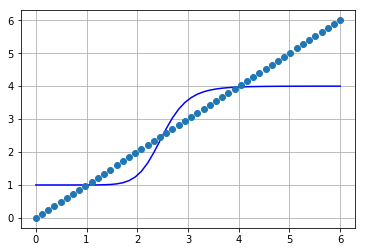

In [70]:
import matplotlib.pyplot as plt
x_hill = np.linspace(0,6)
y_hill =  Hill_produce(x_hill, 3, 2.5, 10)
x_line = np.linspace(0,6)
y_line = np.linspace(0,6)

plt.plot(x_hill,y_hill,'b')
plt.plot(x_line,y_line,'o')
plt.grid()

In [73]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
t = np.linspace(0,7)
u0_1 = [0,0]
u0_2 = [0,2]
u0_3 = [0,2.51]
u0_4 = [0, 3]
u0_5 = [0, 6]

u1 = odeint(Y_rate, u0_1, t, (2,alphay, betaY, betaY+1, Kxy, nXY))
u2 = odeint(Y_rate, u0_2, t, (2,alphay, betaY, betaY+1, Kxy,  nXY))
u3 = odeint(Y_rate, u0_3, t, (2,alphay, betaY, betaY+1, Kxy,  nXY))
u4 = odeint(Y_rate, u0_4, t, (2,alphay, betaY, betaY+1, Kxy,  nXY))
u5 = odeint(Y_rate, u0_5, t, (2,alphay, betaY, betaY+1, Kxy,  nXY))

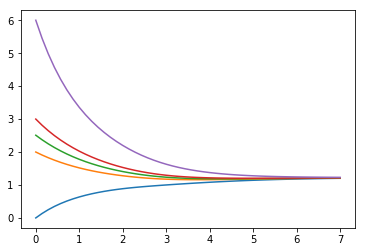

In [74]:
plt.plot(t, u1[:,1])
plt.plot(t, u2[:,1])
plt.plot(t, u3[:,1])
plt.plot(t, u4[:,1])
plt.plot(t, u5[:,1])

In [4]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
t = np.linspace(0,15,1000)
Sx0 = 0.0
Sx1= 1.0
D = [0.0,8.0]
y0 = 0.0
z0 = 0.0
u0 = 0
Y = odeint(Rate_y,u0,t,args=(Sx0,Sx1,D,alphay,betaY,Kxy,nXY))

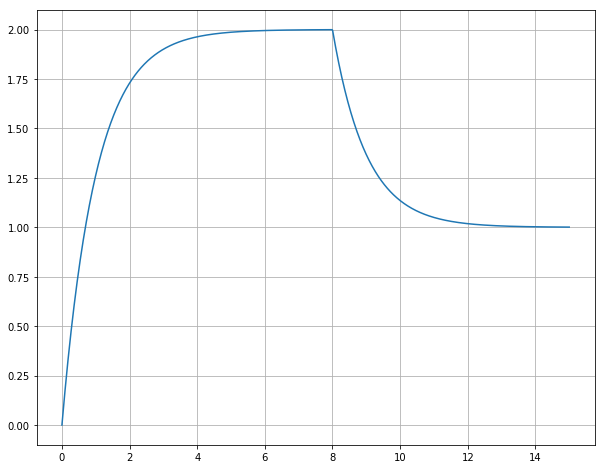

In [5]:
plt.figure(figsize=(10,8))
plt.plot(t,Y)
plt.grid()

# Toggle Switch

In [76]:
def Hill_repress(x,t,Kxy,nXY):
    return Kxy**nXY/(Kxy**nXY+x**nXY)
def Y_t(y,t,x,alphay,betaY,Kxy,nXY):
    return betaY*Hill_X_prod(x,t,Kxy,nXY)-alphay*y
def X_t(x,t,y,alphax,betaX,Kyx,nYX):
    return betaX*Hill_X_prod(y,t,Kyx,nYX)-alphay*y

alphay = 1.
betaY = 1.
Kxy = .7
nXY = 5

alphax = 1.
betaX = 1.



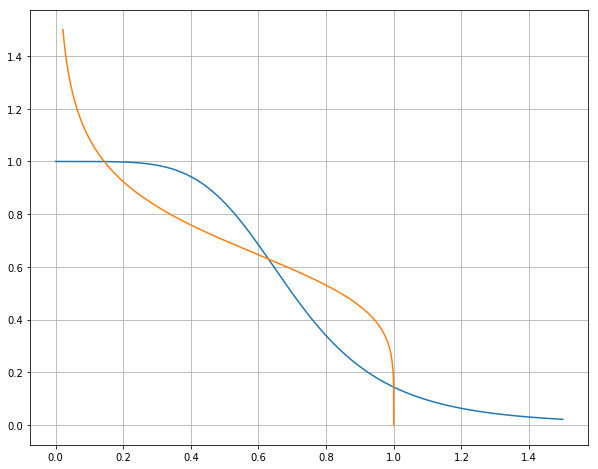

In [84]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
t = np.linspace(0,1.5,1000)
x = np.linspace(0,1.5,1000)
y = np.linspace(0,1.5,1000)
y0 = 1.0
x0 = 1.0
plt.figure(figsize=(10,8))

plt.plot(x,(betaX/alphax)*Hill_repress(x,t,Kxy,nXY)) 
plt.plot((betaY/alphay)*Hill_repress(y,t,Kxy,nXY),y)
plt.grid()
#X_vec = np.linspace(0,1.5,100)
#Y_vec = np.linspace(0,1.5,100)
#U, V = np.meshgrid(X_vec, Y_vec)
from scipy.optimize import fsolve
Xsteady1 = fsolve(g,args=(t,betaX,alphax,betaY,alphay,Kxy,nXY),x0=0)
Xsteady2 = fsolve(g,args=(t,betaX,alphax,betaY,alphay,Kxy,nXY),x0=0.6)
Xsteady3 = fsolve(g,args=(t,betaX,alphax,betaY,alphay,Kxy,nXY),x0=1)

Ysteady1 = (betaY/alphay)*Hill_repress(Xsteady1,Xsteady1,Kxy,nXY)
Ysteady2 = (betaY/alphay)*Hill_repress(Xsteady2,Xsteady1,Kxy,nXY)
Ysteady3 = (betaY/alphay)*Hill_repress(Xsteady3,Xsteady1,Kxy,nXY)

#plt.scatter([Xsteady1,Xsteady2,Xsteady3],[Ysteady1,Ysteady2,Ysteady3],marker='o')

In [85]:
def g(x,t,betaX,alphaX,betaY,alphaY,Kxy,nXY):
    return betaX*Hill_repress((betaY/alphaY)*Hill_produce(x,t,Kxy,nXY),t,Kxy,nXY)-(alphaX*x)



## Oscilation

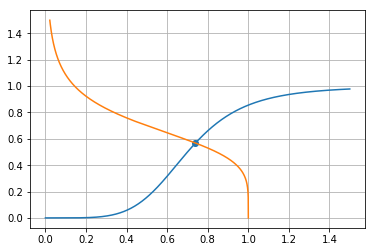

In [87]:
from scipy.optimize import fsolve
def Hill_produce(x,t,Kxy,nXY):
    return x**nXY/(Kxy**nXY+x**nXY)

import matplotlib.pyplot as plt
t = np.linspace(0,1.5,1000)
x = np.linspace(0,1.5,1000)
y = np.linspace(0,1.5,1000)

plt.plot(x,(betaX/alphax)*Hill_produce(x,t,Kxy,nXY)) 
plt.plot((betaY/alphay)*Hill_repress(y,t,Kxy,nXY),y)
plt.grid()

Xsteady1 = fsolve(g,args=(t,betaX,alphax,betaY,alphay,Kxy,nXY),x0=.6)


Ysteady1 = (betaY/alphay)*Hill_produce(Xsteady1,Xsteady1,Kxy,nXY)

plt.scatter(Xsteady1,Ysteady1)

# Toggle switch Z

In [95]:
alphay = 1.
betaY = 4.
Kxy = 2.5
nXY = 5

alphaX = 1.
betaX = 4.

In [96]:
from scipy.integrate import odeint
def Y_t(y,t,x,z,alphay,betaY,Kxy,nXY):
    return betaY*Hill_repress(x,t,Kxy,nXY)*Hill_produce(y,t,Kxy,nXY)+betaY*Hill_produce(z,t,Kxy,nXY)-alphay*y
def X_t(x,t,y,z,alphax,betaX,Kyx,nYX):
    return betaX*Hill_produce(x,t,Kyx,nYX)*Hill_repress(y,t,Kxy,nXY)+betaX*Hill_repress(z,t,Kyx,nYX)-alphax*x

def Rate_all(u,t,alphaX,betaX,Kyx,nYX,alphay,betaY,Kxy,nXY,D):
    x,y,z = u
    dxdt = X_t(x,t,y,z,alphaX,betaX,Kyx,nYX)
    dydt = Y_t(y,t,x,z,alphay,betaY,Kxy,nXY)
    if t<D or t>D+4:
        dzdt = - alphaX * z
    else:
        dzdt = betaX  - alphaX * z
    return [dxdt,dydt,dzdt]


rr = odeint(Rate_all,[6,1,0],t,args=(alphaX,betaX,Kxy,nXY,alphay,betaY,Kxy,nXY,3)) 
